In [2]:
# Carga de contexto y librerias para el notebook :D
%load_ext kedro.ipython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [1]:
df = catalog.load("PRI_FULL_BASE")   # lee el dataset del catálogo
list(df.columns)  

[10/24/25 23:48:58] INFO     Loading data from PRI_FULL_BASE (ParquetDataset)...               ]8;id=666431;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=90844;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


[
    'TransactionID',
    'CustomerID',
    'CustLocation',
    'TransactionDate',
    'TransactionTime',
    'TransactionAmount (INR)',
    'txn_count',
    'total_spent',
    'avg_spent',
    'max_spent',
    'avg_balance',
    'first_txn_date',
    'last_txn_date',
    'recency_days',
    'tenure_days',
    'txn_per_day',
    'Recency',
    'Frequency',
    'Monetary',
    'RFM Score',
    'Segment_Final',
    'is_fraud',
    'DayOfWeek',
    'IsWeekend',
    'hour',
    'IsLateNight',
    'TimeOfDay',
    'AmountZScoreByLocation',
    'TimeSinceLastTxn',
    'TxnCountInLast24Hours',
    'RiskScore',
    'IsAnomaly'
]

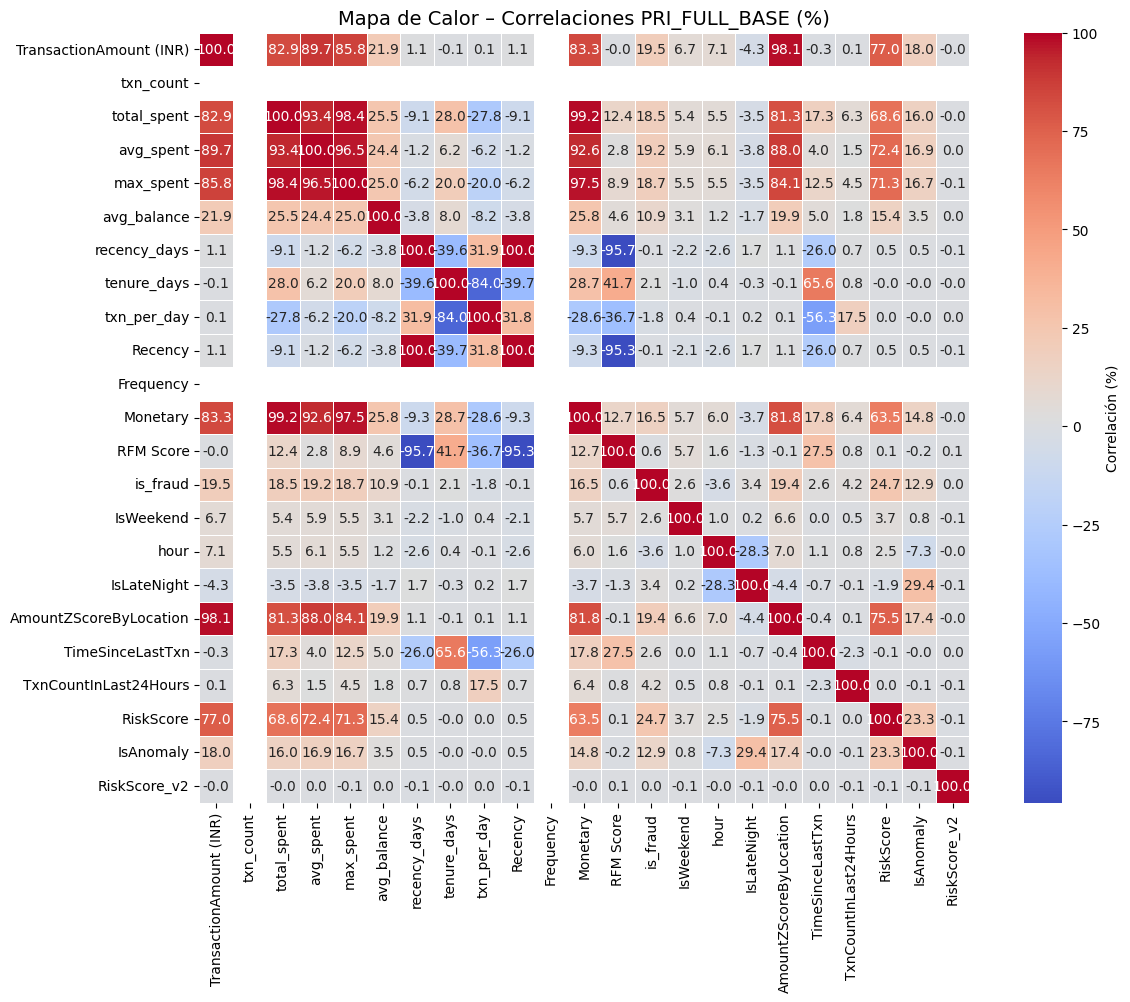

In [11]:
# =========================================================
# 2️⃣ Calcular correlaciones (solo variables numéricas)
# =========================================================
corr = df.select_dtypes(include=[np.number]).corr() * 100  # en porcentaje

# =========================================================
# 3️⃣ Graficar mapa de calor con valores en porcentaje
# =========================================================
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,             # muestra los valores
    fmt=".1f",              # formato: un decimal
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlación (%)"}
)
plt.title("Mapa de Calor – Correlaciones PRI_FULL_BASE (%)", fontsize=14)
plt.show()

In [7]:
df['RiskScore'].describe()
df['RiskScore'].nunique()

2

In [9]:
from sklearn.preprocessing import MinMaxScaler

cols = ['Recency','Frequency','Monetary']
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)

# pesos ajustables según importancia (ejemplo)
df['RiskScore_v2'] = (
    0.4 * (1 - scaled['Recency']) +  # menor recency → más riesgo
    0.3 * scaled['Frequency'] +
    0.3 * scaled['Monetary']
) * 100

In [10]:
df['RiskScore_v2'].describe()


count    984240.000000
mean         24.526267
std          13.499426
min           0.000000
25%          14.113639
50%          22.645338
75%          33.624197
max          70.000000
Name: RiskScore_v2, dtype: float64

In [13]:
df['RiskScore'].describe()
df['RiskScore'].nunique()


2

In [15]:
df['RiskScore'].isna().sum()      # cantidad de NaN
df['RiskScore'].nunique()         # cuántos valores distintos hay
df['RiskScore'].value_counts().head(10)  # muestra los más comunes



RiskScore
0    871786
1    112454
Name: count, dtype: int64